In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, find_peaks
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Cargamos los archivos de pestaneos e hinalar


signalsb = pd.read_csv('C:\\Users\\Juan\\Archivos dat\\inhalar.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
datab = signalsb.values

signalsp = pd.read_csv('C:\\Users\\Juan\\Archivos dat\\pestaneos.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
datap = signalsp.values

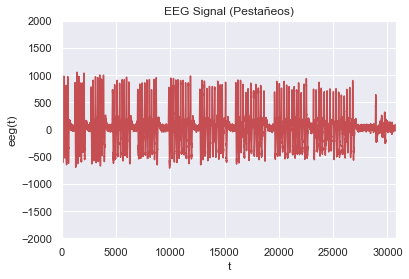

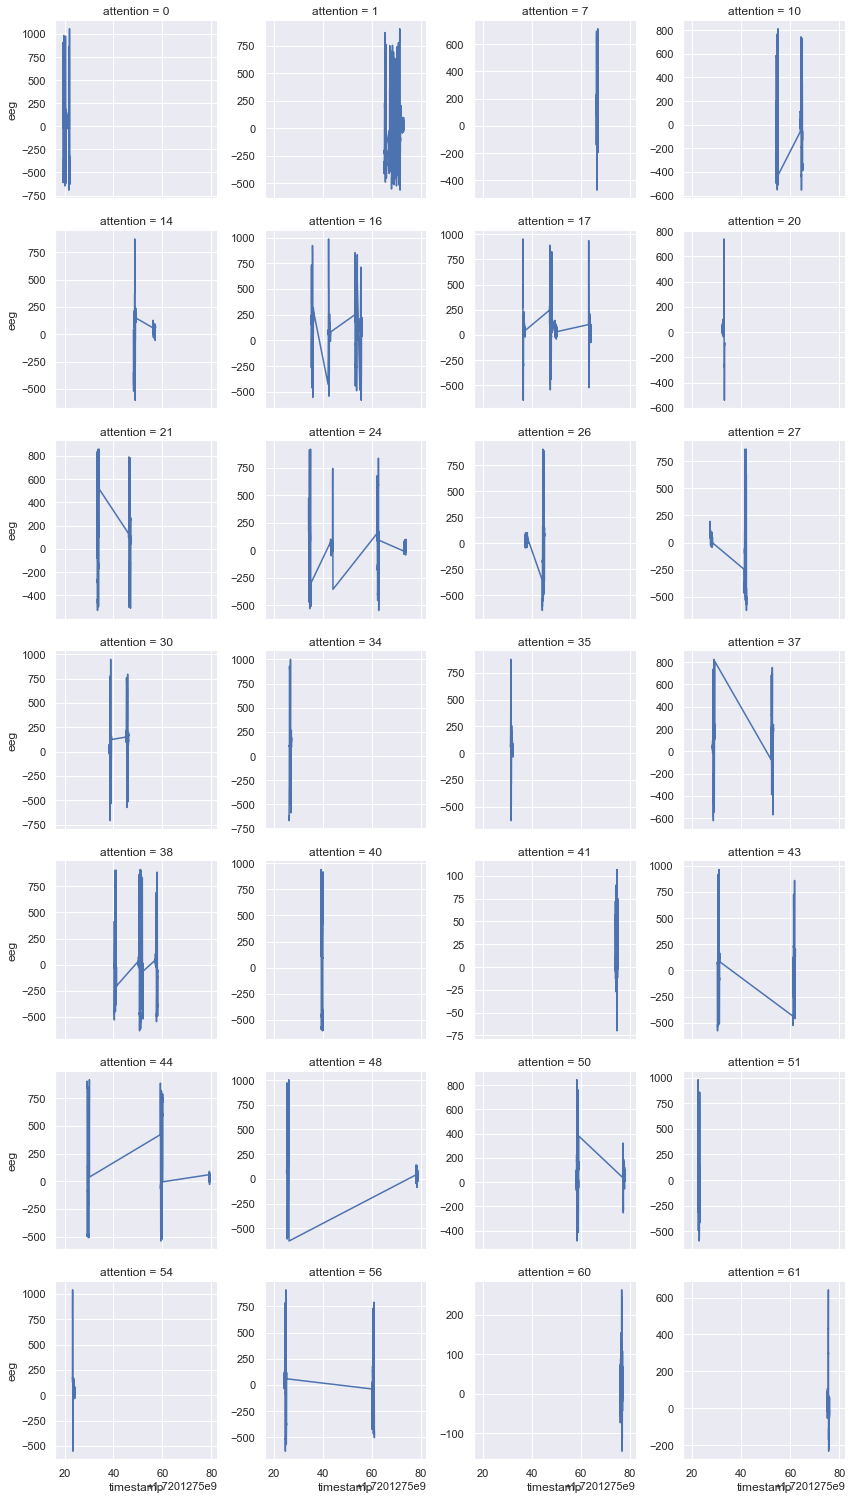

In [41]:
# Graficamos las señales originales de cada arhivo y visualizamos las diferentes actividades a lo largo del tiempo

# Pestaneos
eeg = datap[:, 2]
plt.plot(eeg, 'r', label='EEG')
plt.xlabel('t')
plt.ylabel('eeg(t)')
plt.title('EEG Signal (Pestañeos)')
plt.ylim([-2000, 2000])
plt.xlim([0, len(eeg)])
plt.show()

g = sns.FacetGrid(signalsp, col="attention", col_wrap=4, sharey=False)
g.map(sns.lineplot, "timestamp", "eeg")
plt.show()



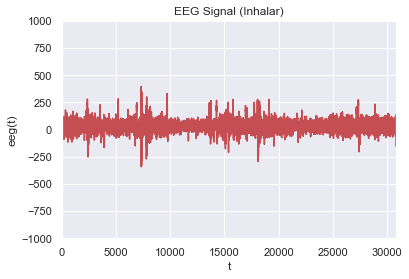

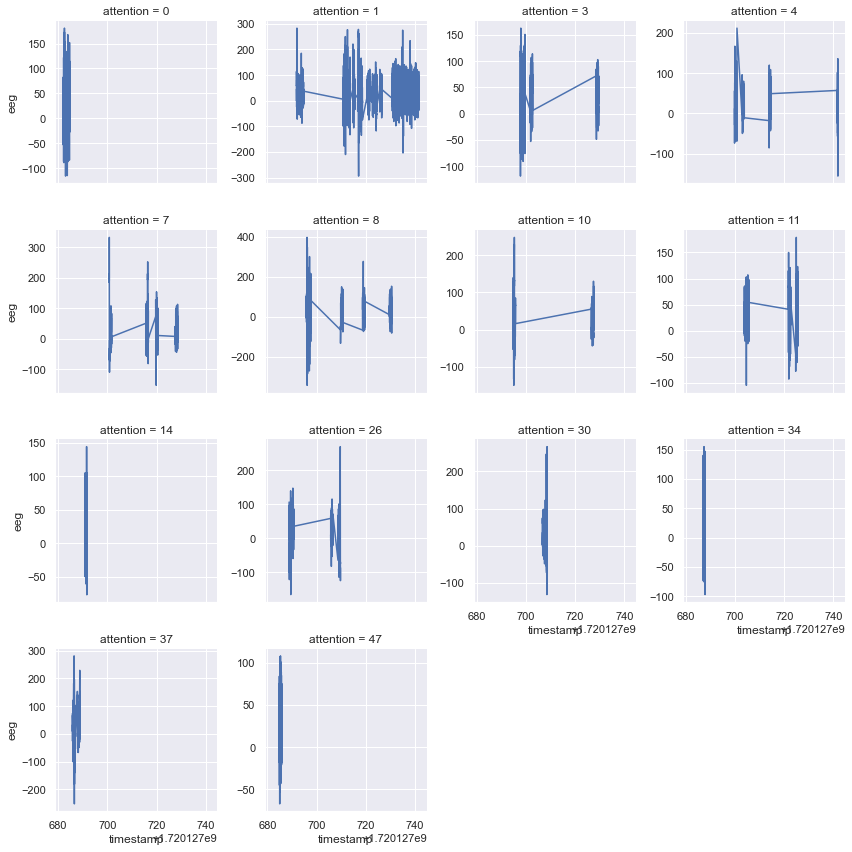

In [45]:
# Inhalar
eeg = datab[:, 2]
plt.plot(eeg, 'r', label='EEG')
plt.xlabel('t')
plt.ylabel('eeg(t)')
plt.title('EEG Signal (Inhalar)')
plt.ylim([-1000, 1000])
plt.xlim([0, len(eeg)])
plt.show()

g = sns.FacetGrid(signalsb, col="attention", col_wrap=4, sharey=False)
g.map(sns.lineplot, "timestamp", "eeg")
plt.show()

In [16]:
#Vamos a realizar un analisis exploratorio para contar los eventos de pestañeo en la señal

# Leemos los datos del archivo pestaneos

import csv
import numpy as np
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt

results = []

# Open blinking.dat file.
with open('C:\\Users\\Juan\\Archivos dat\\pestaneos.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results.append(rows[1:])

In [17]:
# Convert the file into numpy array of ints.
results = np.asarray(results)
results = results.astype(int)




File Length:30826
Some values from the dataset:

[[ 49   0   0   0   0]
 [ 50 -17   0   0   0]
 [ 51   9   0   0   0]
 [ 52  52   0   0   0]
 [ 53  69   0   0   0]
 [ 54  75   0   0   0]
 [ 55  75   0   0   0]
 [ 56  70   0   0   0]
 [ 57  84   0   0   0]
 [ 58 101   0   0   0]]
Matrix dimension: (30826, 5)
EEG Vector Metrics

Length: 30825
Max value: 1056
Min value: -709
Range: 1765
Average value: 31.114971613949717
Variance: 90475.55421056287
Std: 300.79154610886735


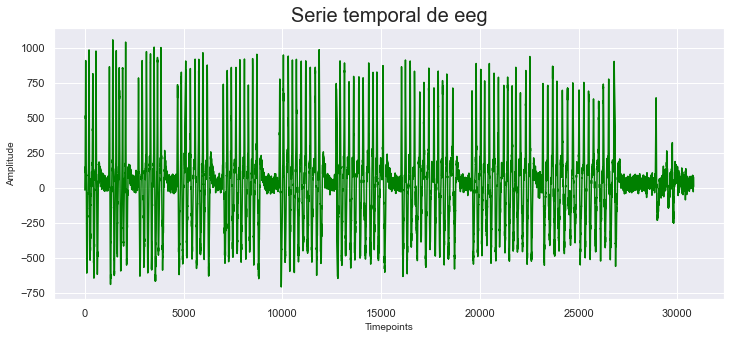

In [18]:
# Identificamos y seleccionamos la variable EEG
eeg = results[1:,1]

print('File Length:'+str(len(results)))
print("Some values from the dataset:\n")
print(results[0:10,])
print("Matrix dimension: {}".format(results.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg)))
print("Max value: {}".format(eeg.max()))
print("Min value: {}".format(eeg.min()))
print("Range: {}".format(eeg.max()-eeg.min()))
print("Average value: {}".format(eeg.mean()))
print("Variance: {}".format(eeg.var()))
print("Std: {}".format(math.sqrt(eeg.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()

normality = NormaltestResult(statistic=1270.6016636265354, pvalue=1.236956408490448e-276)


C:\Users\Juan\anaconda3\envs\mne3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


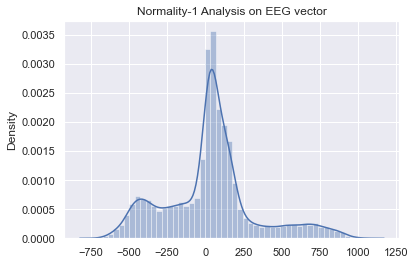

C:\Users\Juan\anaconda3\envs\mne3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


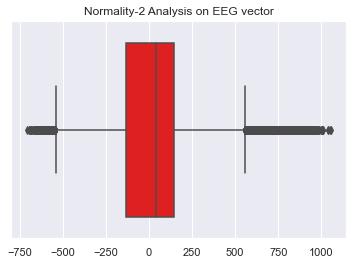

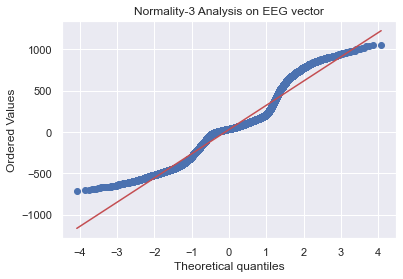

In [19]:
# Prueba de normalidad
print('normality = {}'.format(scipy.stats.normaltest(eeg)))
sns.distplot(eeg)
plt.title("Normality-1 Analysis on EEG vector")
plt.show()
sns.boxplot(eeg,color="red")
plt.title("Normality-2 Analysis on EEG vector")
plt.show()
res = stats.probplot(eeg, plot = plt)
plt.title("Normality-3 Analysis on EEG vector") 
plt.show()

Upper Threshold: 933
Lower Threshold: -871


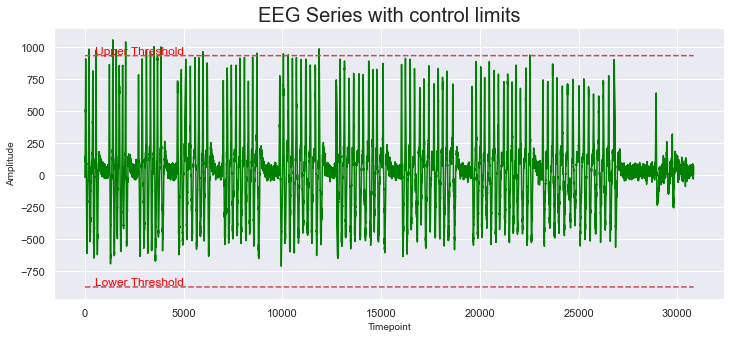

In [20]:
#Calcuolamos los umbrales superiores e inferiores para determinar qué es un pestañeo y qué no
umbral_superior=int(eeg.mean()+3*eeg.std())
print("Upper Threshold: {}".format(umbral_superior))
umbral_inferior=int(eeg.mean()-3*eeg.std())
print("Lower Threshold: {}".format(umbral_inferior))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.plot(np.full(len(eeg),umbral_superior),'r--')
plt.plot(np.full(len(eeg),umbral_inferior),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("EEG Series with control limits",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior+10),color="red")
plt.show()

209
561
1409
1588
2061
3115
3321
3505
3849
5975
8709
10052
10297
11863
22532
Blinking counter: 15


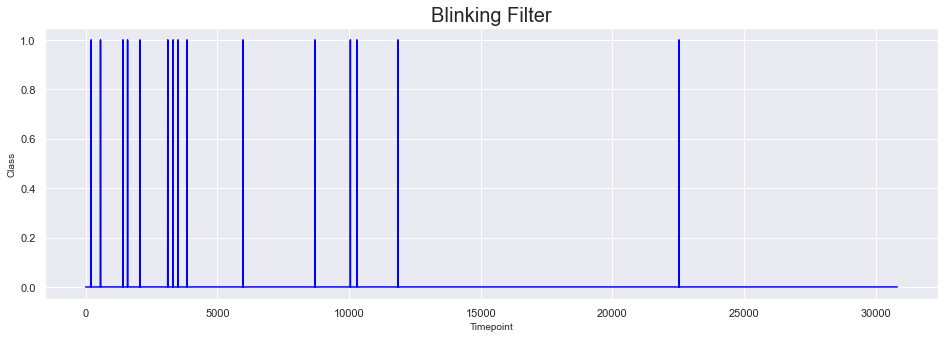

In [21]:
#Contamos los eventos de pestañeos

filtro_eeg=[]
contador=0
for i in range(len(eeg)):
    if i==0:
        filtro_eeg.append(0)
    elif eeg[i]>umbral_superior:
        filtro_eeg.append(1)
        if eeg[i-1]<=umbral_superior:
            print(i)
            contador=contador+1
    elif eeg[i]<umbral_inferior:
        filtro_eeg.append(-1)
    else:
        filtro_eeg.append(0)
        
print("Blinking counter: {}".format(contador))
filtro_eeg=np.asarray(filtro_eeg)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg,color="blue")
plt.title("Blinking Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()

In [46]:
# Repetimos el proceso anterior pero ahora para los eventos de inhalacion

# Leemos el archivo inhalar

import csv
import numpy as np
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt

results = []

# Open inhalar.dat file.
with open('C:\\Users\\Juan\\Archivos dat\\inhalar.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results.append(rows[1:])

In [47]:
# Convert the file into numpy array of ints.
results = np.asarray(results)
results = results.astype(int)


# Identificamos y seleccionamos la variable EEG
eeg = results[1:,1]

File Length:30840
Some values from the dataset:

[[49 20  0  0  0]
 [50 40  0  0  0]
 [51 50  0  0  0]
 [52 41  0  0  0]
 [53 29  0  0  0]
 [54 26  0  0  0]
 [55 26  0  0  0]
 [56 33  0  0  0]
 [57 36  0  0  0]
 [58 49  0  0  0]]
Matrix dimension: (30840, 5)
EEG Vector Metrics

Length: 30839
Max value: 397
Min value: -342
Range: 739
Average value: 30.65767372482895
Variance: 2234.019230893123
Std: 47.26541262797907


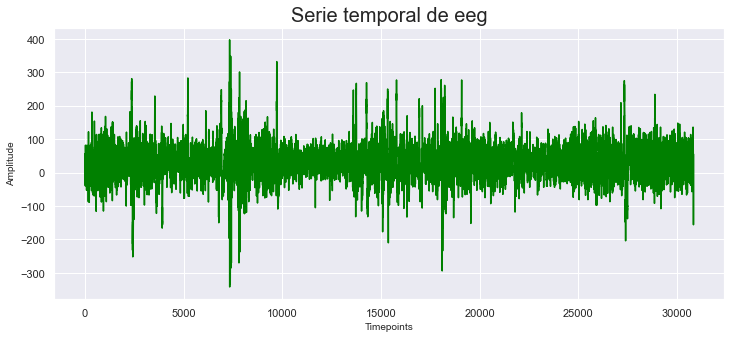

In [48]:
print('File Length:'+str(len(results)))
print("Some values from the dataset:\n")
print(results[0:10,])
print("Matrix dimension: {}".format(results.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg)))
print("Max value: {}".format(eeg.max()))
print("Min value: {}".format(eeg.min()))
print("Range: {}".format(eeg.max()-eeg.min()))
print("Average value: {}".format(eeg.mean()))
print("Variance: {}".format(eeg.var()))
print("Std: {}".format(math.sqrt(eeg.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()

normality = NormaltestResult(statistic=3612.701779271528, pvalue=0.0)


C:\Users\Juan\anaconda3\envs\mne3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


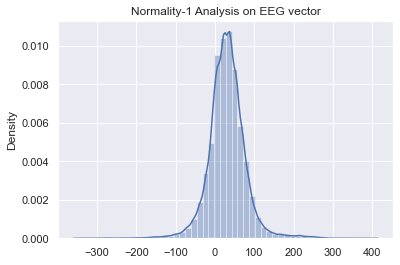

C:\Users\Juan\anaconda3\envs\mne3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


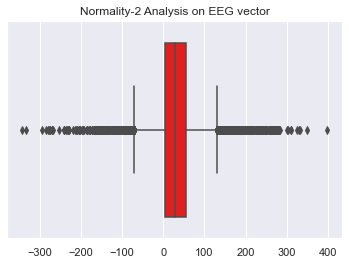

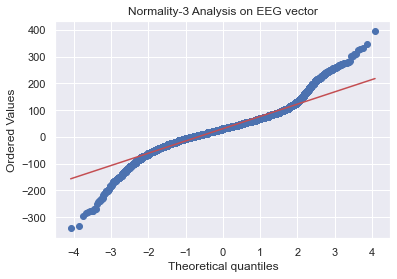

In [49]:
# Prueba de normalidad
print('normality = {}'.format(scipy.stats.normaltest(eeg)))
sns.distplot(eeg)
plt.title("Normality-1 Analysis on EEG vector")
plt.show()
sns.boxplot(eeg,color="red")
plt.title("Normality-2 Analysis on EEG vector")
plt.show()
res = stats.probplot(eeg, plot = plt)
plt.title("Normality-3 Analysis on EEG vector") 
plt.show()

Upper Threshold: 172
Lower Threshold: -111


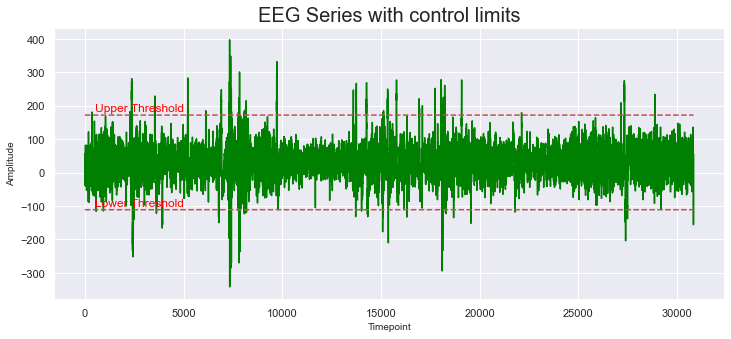

In [37]:
#Calcuolamos los umbrales superiores e inferiores para determinar qué es una inhalacion y qué no

umbral_superior=int(eeg.mean()+3*eeg.std())
print("Upper Threshold: {}".format(umbral_superior))
umbral_inferior=int(eeg.mean()-3*eeg.std())
print("Lower Threshold: {}".format(umbral_inferior))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.plot(np.full(len(eeg),umbral_superior),'r--')
plt.plot(np.full(len(eeg),umbral_inferior),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("EEG Series with control limits",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior+10),color="red")
plt.show()

357
2285
2354
2395
3534
3536
3547
3553
3558
5202
5207
6125
6899
7295
7310
7312
7325
7332
7339
7356
7359
7384
7411
7417
7424
7777
7802
7834
8075
8110
8165
9707
13598
13737
13740
13745
13759
14258
14277
15116
15131
15327
15334
15342
15774
16936
16946
17096
17730
18033
18037
18045
18060
18123
18158
18163
18195
18220
18226
18234
19079
22123
27154
27166
27322
27347
28874
Inhalacion counter: 67


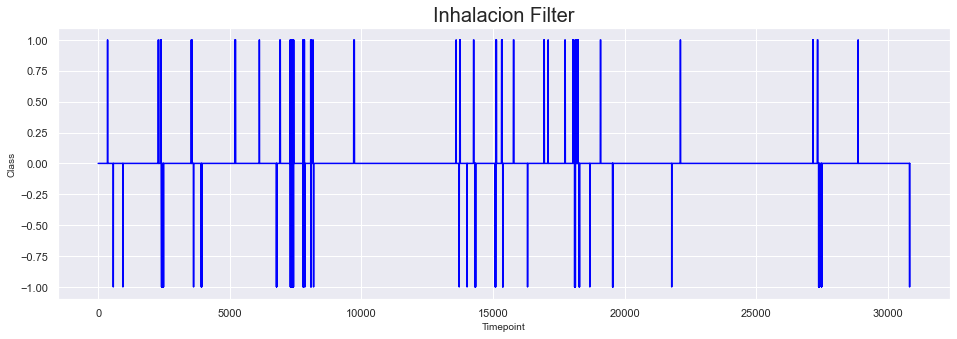

In [38]:
#Contamos los eventos de inhalacion

filtro_eeg=[]
contador=0
for i in range(len(eeg)):
    if i==0:
        filtro_eeg.append(0)
    elif eeg[i]>umbral_superior:
        filtro_eeg.append(1)
        if eeg[i-1]<=umbral_superior:
            print(i)
            contador=contador+1
    elif eeg[i]<umbral_inferior:
        filtro_eeg.append(-1)
    else:
        filtro_eeg.append(0)
        
print("Inhalacion counter: {}".format(contador))
filtro_eeg=np.asarray(filtro_eeg)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg,color="blue")
plt.title("Inhalacion Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()